In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
base_url:str = "https://allbooksworld.com/page/{page_number}/"

In [4]:
def generate_url(url:str, page_number:int) -> str:
    """generate url with page number

    Args:
        url (str): url to scrape
        page_number (int): page number of the url

    Returns:
        str: modified url with pagination
    """
    return url.format(page_number=page_number)


In [5]:
url:str = generate_url(base_url, 2627)

In [7]:
response = requests.get(url)

'<!DOCTYPE html><html lang="en-US"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1"><link rel="profile" href="https://gmpg.org/xfn/11" /><link rel="pingback" href="https://allbooksworld.com/xmlrpc.php" /><meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' /><link media="all" href="https://allbooksworld.com/wp-content/cache/autoptimize/css/autoptimize_907df761bc51fb96cf4ef40adb41e828.css" rel="stylesheet"><title>AllBooksWorld.com - Page 2627 of 2627 - Read Books for Life</title><meta name="description" content="Read Books for Life" /><link rel="canonical" href="https://allbooksworld.com/page/2627/" /><link rel="prev" href="https://allbooksworld.com/page/2626/" /><meta property="og:locale" content="en_US" /><meta property="og:type" content="website" /><meta property="og:title" content="AllBooksWorld.com" /><meta property="og:description" content="Read Books for Life" /><meta proper
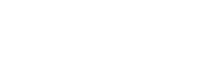
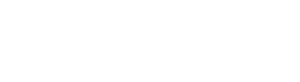

In [45]:
response.text

In [8]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://allbooksworld.com/xmlrpc.php" rel="pingback"/>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
   <link href="https://allbooksworld.com/wp-content/cache/autoptimize/css/autoptimize_907df761bc51fb96cf4ef40adb41e828.css" media="all" rel="stylesheet"/>
   <title>
    AllBooksWorld.com - Page 2627 of 2630 - Read Books for Life
   </title>
   <meta content="Read Books for Life" name="description"/>
   <link href="https://allbooksworld.com/page/2627/" rel="canonical">
    <link href="https://allbooksworld.com/page/2626/" rel="prev"/>
    <link href="https://allbooksworld.com/page/2628/" rel="next"/>
    <meta content="en_US" property="og:locale"/>
    <meta content="website" property="og:type"/>
    <meta content="A

In [47]:
pagination = soup.find("div", class_="post-pagination")
pagination

<div class="post-pagination clearfix"> <a class="prev page-numbers" href="https://allbooksworld.com/page/2626/">«</a> <a class="page-numbers" href="https://allbooksworld.com/page/1/">1</a> <span class="page-numbers dots">…</span> <a class="page-numbers" href="https://allbooksworld.com/page/2625/">2,625</a> <a class="page-numbers" href="https://allbooksworld.com/page/2626/">2,626</a> <span aria-current="page" class="page-numbers current">2,627</span></div>

In [48]:
pagination.find('a', class_="next")

In [9]:
section = soup.find("section", id="content")

In [10]:
articles = section.find_all("article", class_="post")

In [11]:
article = articles[0]

In [12]:
book_name = article.find(class_="post-title").text.strip()
article.find(class_="post-title")

<h2 class="entry-title post-title"><a href="https://allbooksworld.com/the-hummingbird-heart-by-a-g-howard-pdf-download/" rel="bookmark">The Hummingbird Heart by A G Howard PDF Download</a></h2>

: 

In [53]:
book_info_link = article.find(class_="post-title").a["href"]

In [13]:


def create_soup(url:str) -> BeautifulSoup:
    """get successful response using requests and then
    create soup object

    Args:
        url (str): url to create soup

    Returns:
        BeautifulSoup: soup object
    """
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")
        return soup
    except Exception as e:
        raise e


def get_book_articles(soup):
    articles = soup.find_all("article", class_="post")
    return articles

def get_book_name(book_article):
    return book_article.find(class_="post-title").text.strip()

def get_book_info_link(book_article):
    return book_article.find(class_="post-title").a["href"].strip()

def get_book_info_urls(url:str) -> dict:
    """get book info urls from given url by using BeautifulSoup

    Args:
        url (str): page url to scrape

    Returns:
        dict: { name_of_book : url_of_book }
    """
    soup = create_soup(url)
    articles = get_book_articles(soup)
    urls = {}
    for article in articles:
        book_name = get_book_name(article)
        book_info_url = get_book_info_link(article)
        urls[book_name] = book_info_url
    return urls

In [55]:
book_info_urls = get_book_info_urls(url)
book_info_urls

{'Wrong  by Jana Aston  ePub Download': 'https://allbooksworld.com/wrong-by-jana-aston-epub-download-novel1/',
 'Introductory Statistics (3rd Edition) by Sheldon M. Ross PDF Download': 'https://allbooksworld.com/introductory-statistics/',
 'The Bat by Jo Nesbo ePub Download': 'https://allbooksworld.com/the-bat-novel1/',
 'Hell In The Heartland by Jax Miller ePub Download': 'https://allbooksworld.com/hell-in-the-heartland/'}

In [56]:
url

'https://allbooksworld.com/page/2627/'

In [74]:
def get_next_url(soup:BeautifulSoup):
    pagination = soup.find("div", class_="post-pagination")
    next = pagination.find('a', class_="next")
    return next["href"].strip() if next else None

In [16]:
url:str = generate_url(base_url, 1)
url

'https://allbooksworld.com/page/1/'

In [ ]:
soup = create_soup(url)
soup

In [80]:
next_url = get_next_url(soup)
next_url

'https://allbooksworld.com/page/2/'

In [82]:

while(url):
    soup = create_soup(url)
    url = get_next_url(soup)
    print(url)


https://allbooksworld.com/page/2/
https://allbooksworld.com/page/3/
https://allbooksworld.com/page/4/
https://allbooksworld.com/page/5/
https://allbooksworld.com/page/6/
https://allbooksworld.com/page/7/
https://allbooksworld.com/page/8/
https://allbooksworld.com/page/9/
https://allbooksworld.com/page/10/
https://allbooksworld.com/page/11/
https://allbooksworld.com/page/12/
https://allbooksworld.com/page/13/
https://allbooksworld.com/page/14/
https://allbooksworld.com/page/15/
https://allbooksworld.com/page/16/
https://allbooksworld.com/page/17/
https://allbooksworld.com/page/18/
https://allbooksworld.com/page/19/
https://allbooksworld.com/page/20/
https://allbooksworld.com/page/21/
https://allbooksworld.com/page/22/
https://allbooksworld.com/page/23/
https://allbooksworld.com/page/24/
https://allbooksworld.com/page/25/
https://allbooksworld.com/page/26/
https://allbooksworld.com/page/27/
https://allbooksworld.com/page/28/
https://allbooksworld.com/page/29/
https://allbooksworld.com/pa

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [1]:
import aiohttp
import asyncio

In [17]:
async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            return await response.text()

In [19]:
async def main(url):
    html = await fetch(url)
    print(html)

In [22]:
loop = asyncio.get_event_loop()
loop.run_until_complete(main(url))

RuntimeError: This event loop is already running